In [12]:
from py_wake.wind_farm_models.engineering_models import PropagateUpDownIterative, PropagateDownwind, All2AllIterative, All2All
from py_wake.site.xrsite import UniformSite
from py_wake.examples.data.hornsrev1 import V80
from py_wake.deficit_models.noj import NOJLocalDeficit
from py_wake.deficit_models import NoWakeDeficit, SelfSimilarityDeficit
import matplotlib.pyplot as plt
from py_wake.flow_map import XYGrid
from py_wake.wind_turbines.power_ct_functions import PowerCtFunctionList, PowerCtTabular
import numpy as np

# replace powerCtFunction
windTurbines = V80()
windTurbines.powerCtFunction = PowerCtFunctionList(
    key='operating',
    powerCtFunction_lst=[PowerCtTabular(ws=[0, 100], power=[0, 0], power_unit='w', ct=[0, 0]), # 0=No power and ct
                         V80().powerCtFunction], # 1=Normal operation
    default_value=1)

grid = XYGrid(x=np.linspace(-200,600,500), y=np.linspace(-100,170,500),h=70)
x,y = [0,200,400], [0,35,70]
wake_deficitModel=NOJLocalDeficit(a = [0,.1], use_effective_ti=False, rotorAvgModel=None)
blockage_deficitModel=SelfSimilarityDeficit(upstream_only=True, use_effective_ws=True)
wfm_kwargs = dict(site=UniformSite(), windTurbines=windTurbines, wake_deficitModel=wake_deficitModel)

## PropagateDownwind

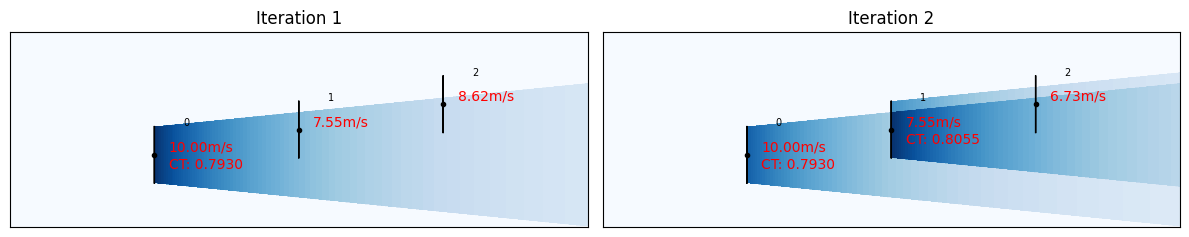

In [36]:
wfm = PropagateDownwind(**wfm_kwargs)
axes = plt.subplots(1,2, figsize=(12,3))[1]
for it, op in enumerate([(1,0,0),(1,1,0)]):
    ax = axes[it]
    ax.set_title(f"Iteration {it+1}")
    
    sim_res = wfm(x,y,wd=270, ws=10,operating=op)
    sim_res.flow_map(grid).plot_wake_map(ax=ax, plot_colorbar=False)
    nl = '\n'
    for i in sim_res.wt:
        sr = sim_res.sel(wt=i)
        ax.text(sr.x + 20,sr.y+5, f"{sr.WS_eff.item():.2f}m/s", color='r')
        
        if op[i.item()]:
            ax.text(sr.x+20,sr.y-20, f"{nl}CT: {sr.CT.item():.4f}", color='r')
    #ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('scaled')
plt.tight_layout()
plt.savefig('../../_static/PropagateDownwind.png', dpi=300)

## All2AllIterative

add 

`print (WS_eff_ilk.flatten().tolist())` 

to end of `All2AllIterative` loop

In [37]:
wfm = All2AllIterative(**wfm_kwargs, blockage_deficitModel=blockage_deficitModel)
wfm(x,y,wd=270,ws=10);

[9.943960398132953, 7.506366571688376, 6.726080357006192]
[9.944209813406705, 7.516605927128196, 6.7421785555641165]
[9.944121844101979, 7.516461768513265, 6.739548194326255]


[9.925829205098683, 7.487912759672735, 6.167197872318056]


C:\mmpe\programming\python\Topfarm\PyWake\py_wake\wind_farm_models\engineering_models.py:283: UserWarning: The WT dependent WS that was provided for the simulation is not available at the flow map points and therefore ignored
  warnings.warn(


[9.888170211539657, 5.022972498816571, 3.4682589125703087]


C:\mmpe\programming\python\Topfarm\PyWake\py_wake\wind_farm_models\engineering_models.py:283: UserWarning: The WT dependent WS that was provided for the simulation is not available at the flow map points and therefore ignored
  warnings.warn(


[9.888331657508683, 5.03306769564146, 3.4817267498903712]


C:\mmpe\programming\python\Topfarm\PyWake\py_wake\wind_farm_models\engineering_models.py:283: UserWarning: The WT dependent WS that was provided for the simulation is not available at the flow map points and therefore ignored
  warnings.warn(


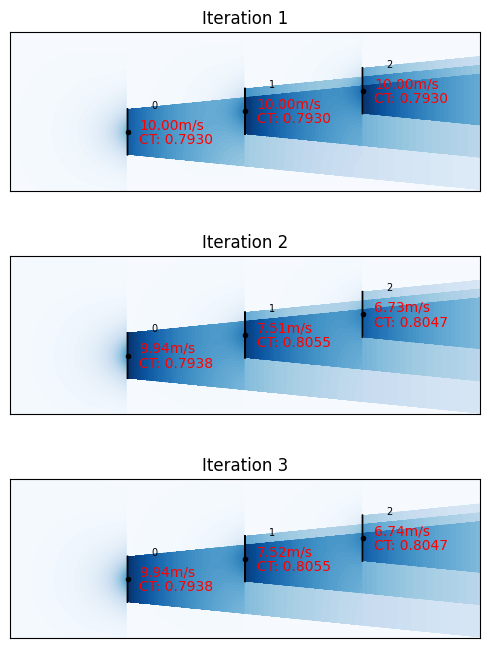

In [38]:
wfm = All2All(**wfm_kwargs, blockage_deficitModel=blockage_deficitModel)
axes = plt.subplots(3,1, figsize=(5,7))[1]
for it, WS in enumerate([[10.0, 10.0, 10.0],
                         [9.943960398132953, 7.506366571688376, 6.726080357006192],
                         [9.944209813406705, 7.516605927128196, 6.7421785555641165]]):
    ax = axes[it]
    ax.set_title(f"Iteration {it+1}")
    x,y = [0,200,400], [0,35,70]
    sim_res = wfm(x,y,wd=270,ws=10, WS=WS)
    sim_res.flow_map(grid).plot_wake_map(ax=ax, plot_colorbar=False)
    nl = '\n'
        
    for i in sim_res.wt:
        sr = sim_res.sel(wt=i, i=i)
        ax.text(sr.x + 20,sr.y+5, f"{sr.WS.item():.2f}m/s", color='r')
        ax.text(sr.x+20,sr.y-20, f"{nl}CT: {sr.CT.item():.4f}", color='r')
    #ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('scaled')
plt.tight_layout()
plt.savefig('../../_static/All2AllIterative.png', dpi=300)

## PropagateUpDownIterative

C:\mmpe\programming\python\Topfarm\PyWake\py_wake\wind_farm_models\engineering_models.py:283: UserWarning: The WT dependent WS that was provided for the simulation is not available at the flow map points and therefore ignored
  warnings.warn(
C:\mmpe\programming\python\Topfarm\PyWake\py_wake\wind_farm_models\engineering_models.py:283: UserWarning: The WT dependent WS that was provided for the simulation is not available at the flow map points and therefore ignored
  warnings.warn(


[0.0, 2.4529933617164446, 3.2739196429938078]


C:\mmpe\programming\python\Topfarm\PyWake\py_wake\wind_farm_models\engineering_models.py:283: UserWarning: The WT dependent WS that was provided for the simulation is not available at the flow map points and therefore ignored
  warnings.warn(
C:\mmpe\programming\python\Topfarm\PyWake\py_wake\wind_farm_models\engineering_models.py:283: UserWarning: The WT dependent WS that was provided for the simulation is not available at the flow map points and therefore ignored
  warnings.warn(


[0.05579018659329549, 0.040640066595179825, 0.0]


C:\mmpe\programming\python\Topfarm\PyWake\py_wake\wind_farm_models\engineering_models.py:283: UserWarning: The WT dependent WS that was provided for the simulation is not available at the flow map points and therefore ignored
  warnings.warn(
C:\mmpe\programming\python\Topfarm\PyWake\py_wake\wind_farm_models\engineering_models.py:283: UserWarning: The WT dependent WS that was provided for the simulation is not available at the flow map points and therefore ignored
  warnings.warn(


[0.0, 2.4427996596367656, 3.260440192186044]


C:\mmpe\programming\python\Topfarm\PyWake\py_wake\wind_farm_models\engineering_models.py:283: UserWarning: The WT dependent WS that was provided for the simulation is not available at the flow map points and therefore ignored
  warnings.warn(
C:\mmpe\programming\python\Topfarm\PyWake\py_wake\wind_farm_models\engineering_models.py:283: UserWarning: The WT dependent WS that was provided for the simulation is not available at the flow map points and therefore ignored
  warnings.warn(


[0.055873578487302566, 0.04072263213440497, 0.0]


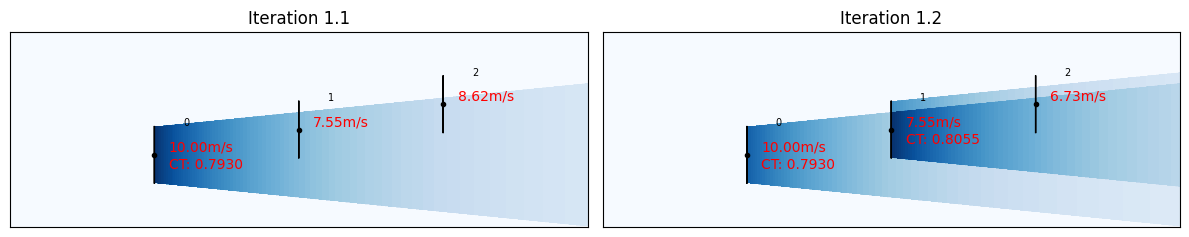

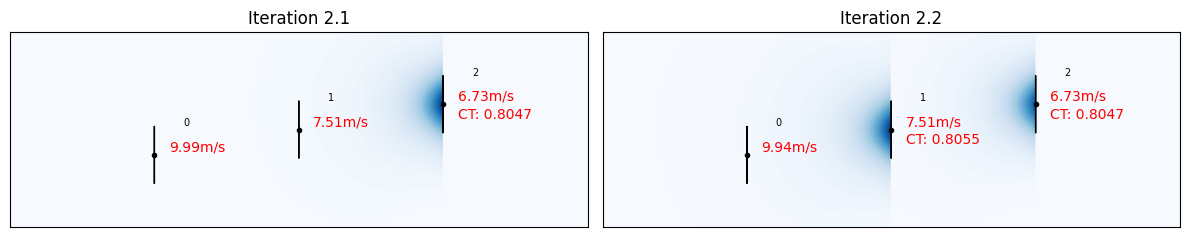

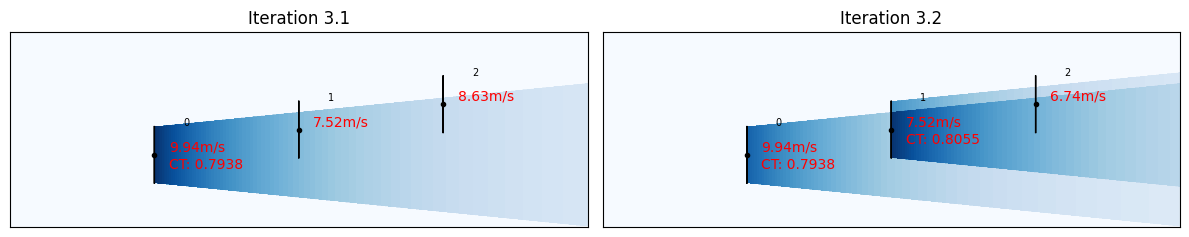

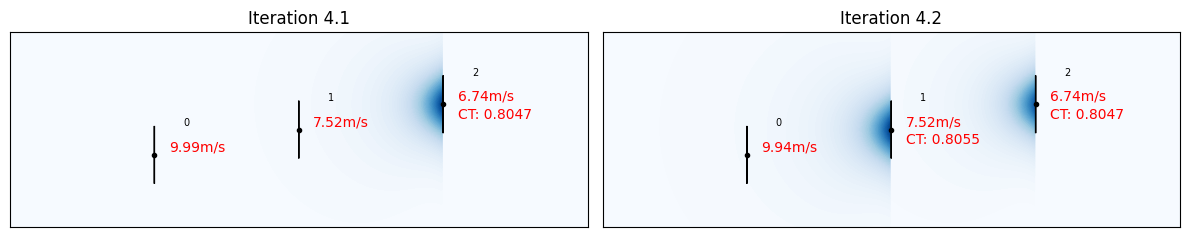

In [35]:
mit = 1

down = PropagateUpDownIterative(**wfm_kwargs), [(1,0,0),(1,1,0)]
up = PropagateUpDownIterative(**{**wfm_kwargs, 'wake_deficitModel':NoWakeDeficit()}, blockage_deficitModel=blockage_deficitModel), [(0,0,1),(0,1,1)]
for mit, ((wfm,op_lst),deficit) in enumerate([(down,[0,0,0]),
                                         (up,[0.0, 2.4529933617164446, 3.2739196429938078]),
                                         (down,[0.05579018659329549, 0.040640066595179825, 0.0]),
                                         (up,[0.0, 2.442754646880182, 3.2604263230388106]),
                                        ],1):
    WS = np.array([10,10,10]) - deficit
    axes = plt.subplots(1,2, figsize=(12,3))[1]
    for it, op in enumerate(op_lst):
        ax = axes[it]
        ax.set_title(f"Iteration {mit}.{it+1}")
        x,y = [0,200,400], [0,35,70]
        sim_res = wfm(x,y,wd=270, ws=10,operating=op, WS=WS)
        grid = XYGrid(x=np.linspace(-200,600,500), y=np.linspace(-100,170,500),h=70)
        sim_res.flow_map(grid).plot_wake_map(ax=ax, plot_colorbar=False)
        nl = '\n'
        for i in sim_res.wt:
            sr = sim_res.sel(wt=i)
            ax.text(sr.x + 20,sr.y+5, f"{sr.WS_eff.item():.2f}m/s", color='r')
            
            if op[i.item()]:
                ax.text(sr.x+20,sr.y-20, f"{nl}CT: {sr.CT.item():.4f}", color='r')
        #ax.set_axis_off()
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('scaled')
    plt.tight_layout()     
    deficit = (WS -  sim_res.WS_eff.squeeze().values)
    print ((deficit).tolist())
    plt.tight_layout()
    plt.savefig(f'../../_static/PropagateUpDownIterative{mit}.png', dpi=300)